# SymPy를 사용한 함수 미분

## 데이터 분석에서 미분의 필요성

그다지 관련이 없어 보이지만 사실 데이터 분석에도 미분(differentiation)이 필요하다. 데이터 분석의 목표 중 하나는 확률 모형의 모수(parameter)나 상태 변수(state)를 추정(estimation)하는 작업이다. 이러한 작업은 근본적으로 함수의 최소점 혹은 최대점을 찾는 최적화(optimization) 작업이며 미분 혹은 편미분을 사용한 도함수를 필요로 한다. 따라서 함수 미분의 지식은 데이터 분석 및 머신 러닝의 각종 내부 구조를 이해하는데 필수적이다.

다행스러운 점은 데이터 분석자 입장에서 필요한 미분의 수준은 그다지 높지 않다는 점이다. 보통은 선형 다항식이나 지수함수의 편미분 정도의 개념만 알고 있으면 되고 대부분의 경우 최적화 라이브러리를 사용하거나 theano, tensorflow 등의 라이브러리에서 도함수나 미분값을 계산해 주기 때문에 실제로 도함수를 구할 일도 그다지 많지는 않다. 

## 함수와 변수

프로그래밍을 익힌 사람에게는 변수(variable)와 함수(function)의 개념이 낯설지 않다. 변수란 실제 값을 대표하는 기호이며 함수는 이러한 변수를 기반으로 만들어진 수식으로 변수값이 어떤 수치로 결정되면 함수 값도 수식에 의해 결정된다.

변수는 보통 $x$, $y$, $z$ 등 알파벳 소문자로 표시하며 함수는 $f(x)$, $g(x,y)$ 와 같이 사용할 입력 변수를 괄호안에 넣어 표시한다. 함수의 결과를 다른 변수에 넣어 다시 사용하는 경우도 있다.

$$ y = f(x) $$
$$ z = g(y) = g(f(x)) $$

 파이썬의 함수는 이러한 함수의 개념을 그대로 구현한 것이다.

In [1]:
def f(x):
    return 2**x

x = 5
y = f(x)
print(x, y)

5 32


역함수(inverse function)는 함수의 입력과 출력을 반대로 한 것이며 다음과 같은 기호로 표시한다.

$$ y = f(x), \;\;\; \rightarrow \;\;\; x = f^{-1}(y) $$

## 예측 문제와 함수

예측(prediction) 문제는 독립 변수, 혹은 feature $x$를 입력으로 하여 원하는 종속 변수 혹은 targer $y$와 가능한 비슷한 값을 만드는 함수 $f$를 찾는 문제라고 할 수 있다.

$$ y \approx \hat{y} = f(x) $$

## 데이터 분석에서 많이 사용되는 함수들

데이터 분석에서 많이 사용되는 함수의 형태는 다항식(polynomial) 함수, 지수(exponential) 함수, 로그(log) 함수 등이다.

### 다항식 함수

다항식 함수는 상수항 $c_0$, 일차항 $c_1x$, 이차항 $c_2x^2$, $\cdots$ 등의 거듭제곱 항의 선형 조합으로 이루어진 함수이다. 다음은 단변수(uni-variate) 다항식 함수의 전형적인 형태이다.

$$ f(x) = c_0 + c_1 x + c_2 x^2 + \cdots + c_n x^n $$

### 지수 함수와 로그 함수

밑(base)를 오일러 수 $e$로 하는 지수함수는 다음과 같이 표시한다. 이는 $e$라는 숫자를 $x$번 거듭제곱한 것이라 생각하면 된다.

$$ y = e^x $$
또는
$$ y = \exp x $$

지수 함수의 역함수는 자연로그 함수이다.

$$ y = \log x $$

만약 밑이 $e$가 아닌 경우에는 다음과 같이 변형하여 사용한다.

$$ y = a^x = e^{\log a \cdot x} $$

## 함수의 그래프와 기울기

함수의 형상을 직관적으로 파악하기 위해 그래프(graph)를 사용하기도 한다. 파이썬에서는 matplotlib의 라인 플롯을 사용하여 그래프를 만들 수 있다.

다만 matplotlib에서는 구체적인 위치가 있어야지만 플롯을 만들 수 있기 때문에 그래프를 작성할 $x$ 영역을 작은 구간으로 나눈 벡터를 생성하고 이 벡터 값에 대한 함수값을 계산하여 그래프를 작성한다. 구간의 간격이 너무 크면 그래프가 부정확해지고 구간의 간격이 너무 작으면 쓸데없이 세부적인 그림을 그리게 되므로 계산 시간이 증가하고 메모리 등의 리소스가 낭비된다.

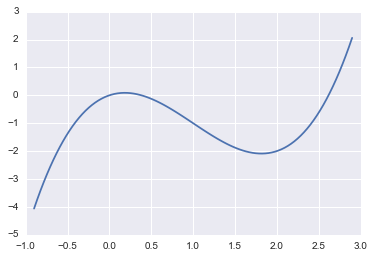

In [3]:
x = np.linspace(-0.9, 2.9, 100)
y = x**3 - 3*x**2 + x
plt.plot(x, y);

함수의 그래프는 앞에서 그린 것처럼 부드러운 곡선(curve)의 형태로 나타나는 경우가 많다. 이 곡선에 대해 한 점만 공통으로 가지는 접선(tangent)를 그릴 수 있는데 이 접선이 수평선과 이루는 각도를 기울기(slope)라고 한다.

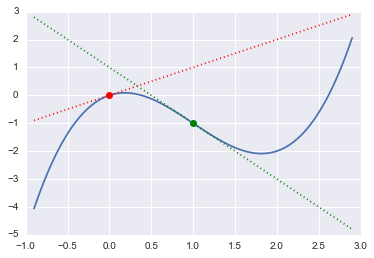

In [11]:
x = np.linspace(-0.9, 2.9, 100)
y = x**3-3*x**2+x
plt.plot(x, y)
plt.plot(0, 0, 'ro'); plt.plot(x, x, 'r:');
plt.plot(1, -1, 'go'); plt.plot(x, (3*1**2 -6*1+1)*(x-1)-1, 'g:');

## 미분

미분(differenciation)이란 이러한 함수로부터 새로운 함수를 도출하는 변환의 일종이다. 미분을 통해 만들어진 새로운 함수는 원래 함수의 기울기(slope)를 나타낸다. 미분으로 만들어진 함수를 원래 함수의 도함수(derivative)라고 한다. 실제로는 극한과 수렴이라는 복잡한 개념을 사용하여  미분을 정의하지만 최적화(optimization)를 위해서는 단순히 기울기를 뜻한다고만 알아도 충분하다.

도함수는 함수 기호에 뒤에 prime 윗첨자를 붙이거나 함수 기호의 앞에 $\dfrac{d}{dx}$, $\dfrac{\partial}{\partial x}$ 등을 붙여서 표시한다. 분수처럼 표기하기도 하는데 분모의 위치에는 미분하고자 하는 변수가 오고 분자의 위치에는 미분하는 함수 자체의 기호나 혹은 함수 계산의 결과로 얻어지는 변수를 넣는다.

예를 들어 $y = f(x)$라는 함수를 미분하면 다음과 같다.

$$ f'(x) = \dfrac{d}{dx}(f) = \dfrac{df}{dx}  = \dfrac{d}{dx}(y) = \dfrac{dy}{dx} $$

## 미분 공식

현실적으로 미분은 다음에 설명할 몇가지 공식(formula)를 조합하여 원래 함수에서 도함수를 도출하는 과정이다. 함수가 복잡해지면 몇 페이지에 달아는 공식집이 필요할 정도이지만 여기에서는 가장 핵심적인 몇가지 공식만을 소개한다. 다양한 미분 공식에 대해 알고 싶다면 다음 웹사이트들을 참조한다.

* https://en.wikipedia.org/wiki/Derivative#Rules_of_computation
* https://en.wikipedia.org/wiki/Differentiation_rules

### 기본 미분 공식

* 상수

$$ \dfrac{d}{dx}(c) = 0 $$

$$ \dfrac{d}{dx}(cf) = c \cdot \dfrac{df}{dx} $$

* 거듭제곱

$$ \dfrac{d}{dx}(x^n) = n x^{n-1} $$

* 로그

$$ \dfrac{d}{dx}(\log x) = \dfrac{1}{x} $$

* 지수

$$ \dfrac{d}{dx}(e^x) = e^x $$

* 선형 조합

$$ \dfrac{d}{dx}\left(c_1 f_1 + c_2 f_2 \right) = c_1 \dfrac{df_1}{dx} + c_2 \dfrac{df_2}{dx}$$

이러한 기본 공식을 사용하여 다음 함수를 미분하면,

$$ y = 1 + 2x + 3x^2 + 4\exp(x) + 5\log(x) $$ 

답은 다음과 같다.

$$ \dfrac{dy}{dx} = 2 + 6x + 4\exp(x) + \dfrac{5}{x} $$

### 곱셈 법칙

어떤 함수의 형태가 두 개의 함수를 곱한 것과 같을 때는 다음과 같이 각 개별 함수의 도함수를 사용하여 원래의 함수의 도함수를 구한다.

$$  \dfrac{d}{dx}\left( f  \cdot g \right) =  \dfrac{df}{dx} \cdot g + f \cdot  \dfrac{dg}{dx} $$

곱셈 법칙을 사용하면 다음과 같은 함수를 미분하여,

$$ f = x \cdot \exp(x) $$

다음과 같은 도함수를 구한다.

$$ \dfrac{df}{dx} = \exp(x) + x \exp(x) $$

## 연쇄 법칙

연쇄 법칙(chain rule)은 미분하고자 하는 함수가 어떤 두 함수의 nested form 인 경우 적용할 수 있다.


$$ f(x) = h(g(x)) $$


인 경우 도함수는 다음과 같이 구한다.

$$ \dfrac{df}{dx} = \dfrac{df}{dg} \cdot \dfrac{dg}{dx} $$



예를 들어 정규 분포의 확률 밀도 함수는 기본적으로 다음과 같은 형태라고 볼 수 있다.

$$ f = \exp \dfrac{(x-\mu)^2}{\sigma^2} $$

이 함수의 도함수는 다음과 같이 구할 수 있다.

$$  f = exp(z) \;,\;\;\;\; z = \dfrac{y^2}{\sigma^2}   \;,\;\;\;\;   y = x-\mu   $$


$$ \dfrac{df}{dx} = \dfrac{df}{dz} \cdot \dfrac{dz}{dy} \cdot \dfrac{dy}{dx} $$


$$ \dfrac{df}{dz} = \exp(z) = \exp \dfrac{(x-\mu)^2}{\sigma^2} $$


$$ \dfrac{dz}{dy} =  \dfrac{2y}{\sigma^2} = \dfrac{2(x-\mu)}{\sigma^2} $$


$$ \dfrac{dy}{dx} =  1 $$



$$ \dfrac{df}{dx} =  \dfrac{2(x-\mu)}{\sigma^2} \exp \dfrac{(x-\mu)^2}{\sigma^2}$$

## 로그함수의 미분

로그 함수에 연쇄 법칙을 적용하면 다음과 같은 규칙을 얻을 수 있다.

$$ \dfrac{d}{dx} \log f(x) = \dfrac{f'(x)}{f(x)} $$

## 편미분

만약 함수가 두 개 이상의 독립변수를 가지는 다변수 함수인 경우에도 미분 즉, 기울기는 하나의 변수에 대해서만 구할 수 있다. 이를 편미분(partial differentiation)이라고 한다. 따라서 편미분의 결과로 하나의 함수에 대해 여러개의 도함수가 나올 수 있다.

다음은 편미분의 간단한 예이다.


$$ f(x,y) = x^2 + xy + y^2 $$


$$ f_x(x,y) = \dfrac{\partial f}{\partial x} = 2x + y $$


$$ f_y(x,y) = \dfrac{\partial f}{\partial y} = x + 2y $$


## SymPy

SymPy는 심볼릭 연산(symbolic operation)을 지원하기 위한 파이썬 패키지이다. 심볼릭 연산이란 사람이 연필로 계산하는 미분/적분과 동일한 형태의 연산을 말한다. 즉, $x^2$의 미분 연산을 수행하면 그 결과가 $2x$란 형태로 출력된다.

딥 러닝(deep learning) 등에 많이 사용되는 파이썬의 theano 패키지나 tensorflow 패키지도 뉴럴 네트워크 트레이닝시에 필요한 기울기 함수 계산을 위해 이러한 심볼릭 연산 기능을 갖추고 있다. 

이를 위해서는 SymPy의 `symbols` 명령을 사용하여 $x$라는 기호가 단순한 숫자나 벡터 변수가 아닌 기호에 해당하는 것임을 알려주어야 한다. 

In [13]:
import sympy

In [14]:
sympy.init_printing(use_latex='mathjax')  # Juypter 노트북에서 수학식의 LaTeX 표현을 위해 필요함

In [15]:
x = sympy.symbols('x')
x

x

In [16]:
type(x)

sympy.core.symbol.Symbol

일단 심볼 변수를 정의하면 이를 사용하여 다음과 같이 함수를 정의한다. 이 때 수학 함수는 SymPy 전용 함수를 사용해야 한다.

In [17]:
f = x * sympy.exp(x)
f

   x
x⋅ℯ 

함수가 정의되면 `diff` 명령으로 미분을 할 수 있다. 또한 `simplify` 명령으로 소인수분해 등을 통한 수식 정리가 가능하다.

In [18]:
sympy.diff(f)

   x    x
x⋅ℯ  + ℯ 

In [19]:
sympy.simplify(sympy.diff(f))

         x
(x + 1)⋅ℯ 

편미분을 하는 경우에는 어떤 변수로 미분하는지를 명시해야 한다.

In [20]:
x, y = sympy.symbols('x y')
f = x**2 + x*y + y**2
f

 2          2
x  + x⋅y + y 

In [22]:
sympy.diff(f, x)

2⋅x + y

In [23]:
sympy.diff(f, y)

x + 2⋅y

복수의 기호를 사용하는 경우에도 편미분을 해야 한다.

In [24]:
x, mu, sigma = sympy.symbols('x mu sigma')
f = sympy.exp((x-mu)**2)/sigma**2
f

 ⎛        2⎞
 ⎝(-μ + x) ⎠
ℯ           
────────────
      2     
     σ      

In [25]:
sympy.diff(f, x)

              ⎛        2⎞
              ⎝(-μ + x) ⎠
(-2⋅μ + 2⋅x)⋅ℯ           
─────────────────────────
             2           
            σ            

In [26]:
sympy.simplify(sympy.diff(f, x))

            ⎛       2⎞
            ⎝(μ - x) ⎠
2⋅(-μ + x)⋅ℯ          
──────────────────────
           2          
          σ           